In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import numpy as np

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


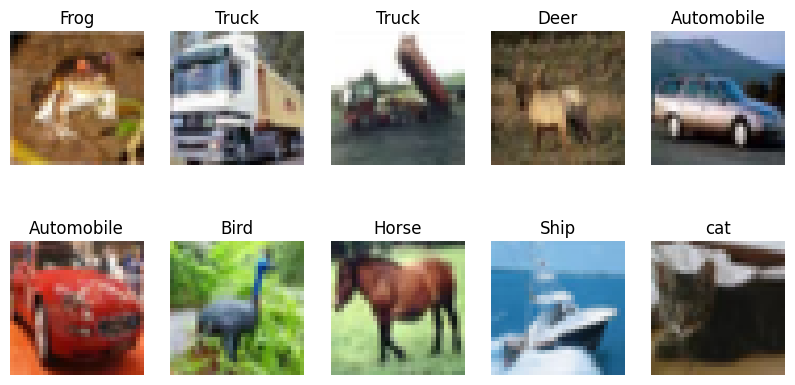

In [ ]:
# load dataset
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

# normalize pixel , value (scale between 0 and 1)
x_train,x_test=x_train / 255.0, x_test / 255.0

# convert label to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# display some sample images
class_names=['Airplane','Automobile','Bird','cat','Deer','Dog','Frog','Horse','Ship','Truck']

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.show()


In [ ]:
model = models.Sequential()

# convolutional and pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# fully connected layers

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile the model

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# train the model
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),batch_size=64)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 81ms/step - accuracy: 0.3347 - loss: 1.7956 - val_accuracy: 0.5385 - val_loss: 1.2929
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.5565 - loss: 1.2369 - val_accuracy: 0.5993 - val_loss: 1.1253
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 80ms/step - accuracy: 0.6198 - loss: 1.0864 - val_accuracy: 0.6377 - val_loss: 1.0291
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 78ms/step - accuracy: 0.6563 - loss: 0.9687 - val_accuracy: 0.6640 - val_loss: 0.9606
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 80ms/step - accuracy: 0.6853 - loss: 0.8936 - val_accuracy: 0.6810 - val_loss: 0.9189
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 80ms/step - accuracy: 0.7106 - loss: 0.8283 - val_accuracy: 0.6833 - val_loss: 0.9201
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 78ms/step - accuracy: 0.7265 - loss: 0.7900 - val_accuracy: 0.7168 - val_loss: 0.8330
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 79ms/step - accuracy: 0.7466 - loss: 0.7291 - 

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)


313/313 - 3s - 10ms/step - accuracy: 0.7248 - loss: 0.8200
Test accuracy: 0.7247999906539917


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


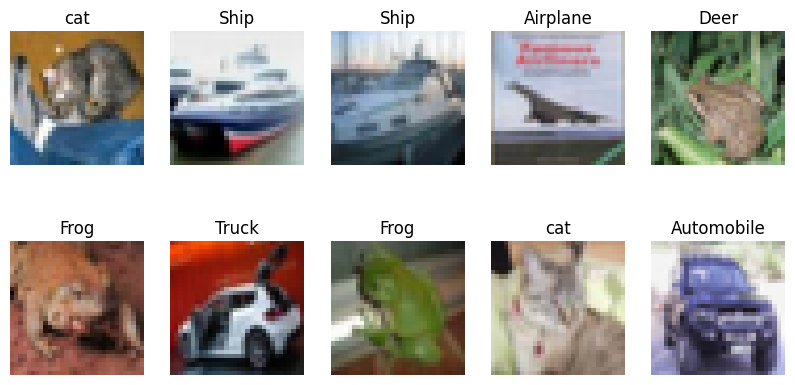

In [ ]:
predictions=model.predict(x_test)
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i])
    plt.title(class_names[np.argmax(predictions[i])])
    plt.axis('off')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
model.save('vansh.keras')
model=tf.keras.models.load_model('vansh.keras')

In [ ]:
image_path = 'images.jpg'
img = image.load_img(image_path, target_size=(32, 32))
image_array = image.img_to_array(img)
image_array = np.expand_dims(image_array, axis=0)
image_array /= 255.0


In [ ]:
# Predict the class of the image
predictions = model.predict(image_array)

# Map prediction to class names (e.g., CIFAR-10 class names)
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
predicted_class = class_names[np.argmax(predictions[0])]

print(f"Predicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Class: Airplane


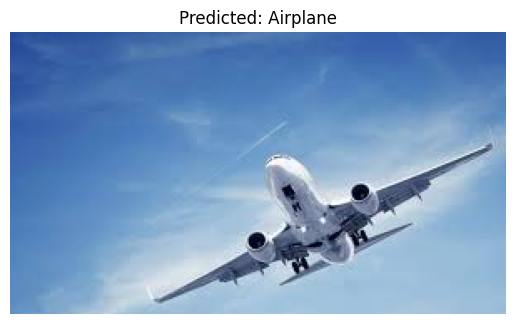

In [ ]:
# Visualize the image with the predicted label
plt.imshow(image.load_img(image_path))
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()